# Pymaceuticals Inc.
---

### Analysis

- Based on tumor volume by treatment, Ramicane shows promise. However Capomulin shows the largest response in terms of mean tumor volume. 
 

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")


# Display the data table for preview
mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [59]:
# Checking the number of mice.
len(mouse_study_df[('Mouse ID')].unique())

249

In [60]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
twice_mice_df = mouse_study_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)
twice_mice_ID = mouse_study_df.loc[twice_mice_df, 'Mouse ID'].unique()
print(twice_mice_ID)

['g989']


In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] == 'g989', :]
duplicate_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] != 'g989']
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [63]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_df['Mouse ID'].unique())

248

## Summary Statistics

In [64]:
drug_df = clean_mouse_df.groupby(['Drug Regimen'])
drug_df['Tumor Volume (mm3)'].mean()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_df = clean_mouse_df.groupby(['Drug Regimen'])

summary_df = pd.DataFrame({'Mean Tumor Volume': drug_regimen_df['Tumor Volume (mm3)'].mean(),
                     'Median Tumor Volume': drug_regimen_df['Tumor Volume (mm3)'].median(),	
                     'Tumor Volume Variance': drug_regimen_df['Tumor Volume (mm3)'].var(),	
                     'Tumor Volume Std. Dev.': drug_regimen_df['Tumor Volume (mm3)'].std(),
                     'Tumor Volume Std. Err.':drug_regimen_df['Tumor Volume (mm3)'].sem()
                     })

summary_df





,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

AttributeError: 'Series' object has no attribute 'title'

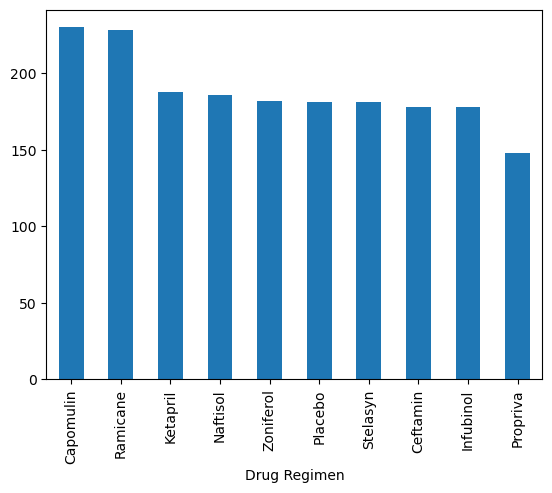

In [67]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_per_regimen = drug_regimen_df['Mouse ID'].count().sort_values(ascending=False)

MPR = mice_per_regimen.plot(kind='bar', width=0.5)

# Set x/y label, title
mice_per_regimen.title('Mice per Drug Regimen')
mice_per_regimen.xlabel('Drug Regimen')
mice_per_regimen.ylabel('Timepoints')
mice_per_regimen.set_xticklabels(summary_df["Drug Regimen"])

plt.show()
plt.tight_layout()


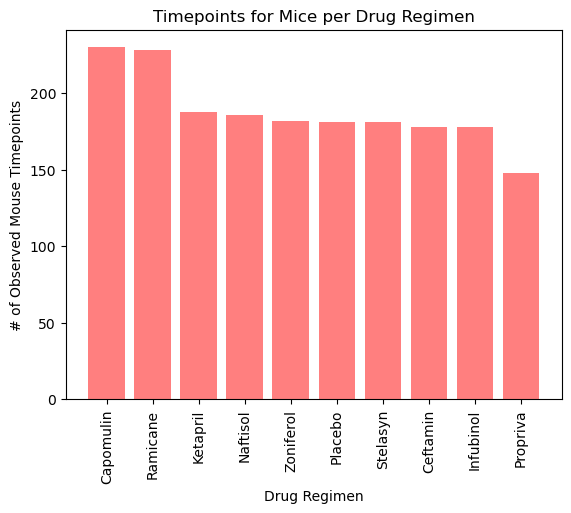

In [68]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(mice_per_regimen))
regimen_name = list(mice_per_regimen.index.values)

# Create bar chart
py_bar_mice_per_regimen = plt.bar(x_axis, mice_per_regimen, color='r', alpha=0.5, align="center")

# Set x/y label, title
plt.xticks(x_axis, regimen_name, rotation='vertical')
plt.title('Timepoints for Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fvm = clean_mouse_df.groupby('Sex')['Sex'].count()
fvm


Sex
Female    922
Male      958
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x2439dcbca60>,
 [Text(-0.0330820140826155, -1.0995024239828841, 'Female'),
  Text(0.03308201408261563, 1.0995024239828841, 'Male')],
 [Text(-0.018044734954153905, -0.5997285948997549, '49.0%'),
  Text(0.018044734954153978, 0.5997285948997549, '51.0%')])

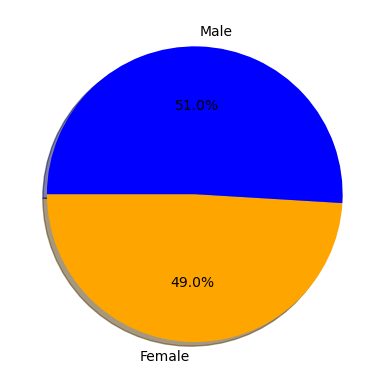

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = ["Female", "Male"]
sizes = [922, 958]
colors = ["orange", "blue"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)

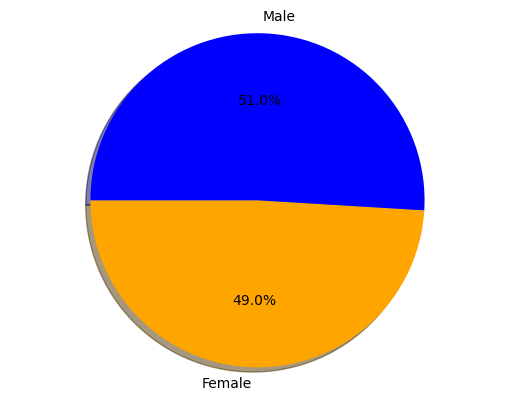

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Female", "Male"]
totals = [922, 958]
colors = ["orange","blue"]
plt.pie(totals, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_df = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] =='Capomulin',:]
ramicane_df = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] =='Ramicane',:]
infubinol_df = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] =='Infubinol',:]
ceftamin_df = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] =='Ceftamin',:]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = capomulin_df.groupby(['Mouse ID']).max(['Timepoint'])


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
group_df = pd.merge(last_timepoint, capomulin_df, how="inner", on="Mouse ID")
group_df2 = pd.merge(last_timepoint, ramicane_df, how="inner", on="Mouse ID")
group_df3 = pd.merge(last_timepoint, infubinol_df, how="inner", on="Mouse ID")
group_df4 = pd.merge(last_timepoint, ceftamin_df, how="inner", on="Mouse ID")

In [104]:
# Put treatments into a list for for loop (and later for plot labels)
# credit to Stack Overflow for help with syntax
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_capomulin = []
tumor_vol_ramicane = []
tumor_vol_infubinol = []
tumor_vol_ceftamin = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = clean_mouse_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")


# Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_timepoint.iterrows():
        if row["Drug Regimen"] == "Capomulin":
            tumor_vol_capomulin.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == "Ramicane":
            tumor_vol_ramicane.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == "Infubinol":
            tumor_vol_infubinol.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == "Ceftamin":
            tumor_vol_ceftamin.append(row["Tumor Volume (mm3)"])
    # add subset 
subset = clean_mouse_df.iloc['Timepoint']
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of tumor volumes is: 45.0
The upper quartile of tumor volumes is: 56.32407510749999
The interquartile range of tumor volumes is: 11.324075107499993
The the median of tumor volumes is: 48.933453655 


KeyError: 'Drug Regimen'

In [102]:
capomulin_df['Tumor Volume (mm3)']

10      45.000000
11      43.878496
12      37.614948
13      38.177232
14      36.866876
          ...    
440     47.685963
1452    45.000000
1453    45.597064
1454    46.059608
1455    46.539206
Name: Tumor Volume (mm3), Length: 230, dtype: float64

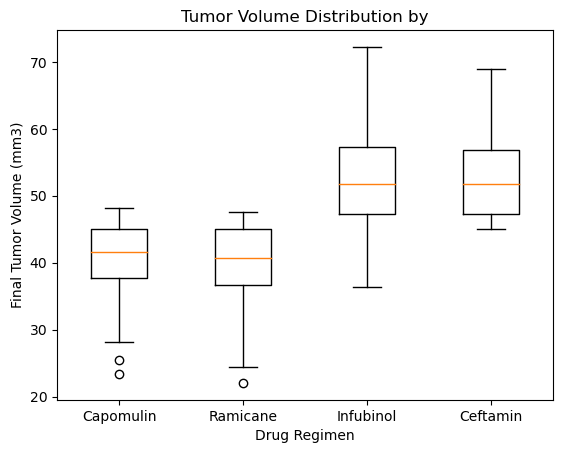

In [110]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
cap_treatment_dist = capomulin_df['Tumor Volume (mm3)']
ram_treatment_dist = ramicane_df['Tumor Volume (mm3)']
inf_treatment_dist = infubinol_df['Tumor Volume (mm3)']
cef_treatment_dist = ceftamin_df['Tumor Volume (mm3)']
dist_plot = [cap_treatment_dist, ram_treatment_dist, inf_treatment_dist, cef_treatment_dist]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Distribution by')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(dist_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

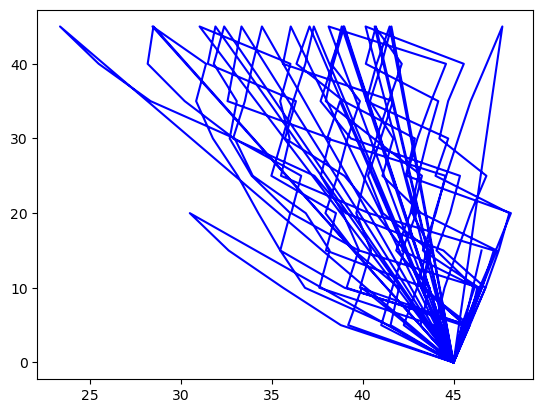

In [108]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

cap_volume = capomulin_df[capomulin_df['Mouse ID'] == "l509"]['Tumor Volume (mm3)']
cap_timepoints = capomulin_df[capomulin_df['Mouse ID'] == "l509"]['Timepoint']
tumor_time = plt.plot(cap_volume, cap_timepoints, color="blue", label="Capomulin treatment of mouse l509" )

plt.show()



In [81]:
avg_capoumlin['Weight (g)']

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

In [84]:
avg_capoumlin['Tumor Volume (mm3)']

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

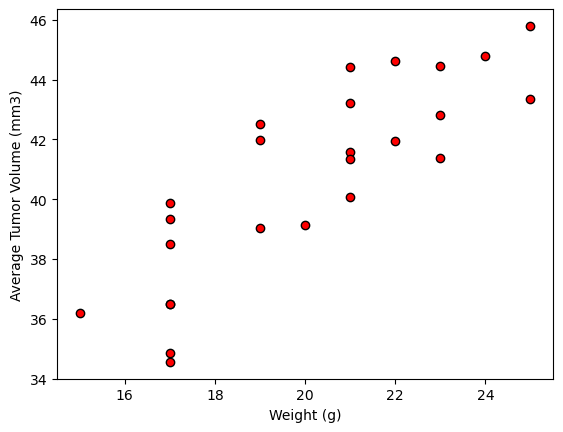

In [85]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_cap = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin", :]
avg_capoumlin = scatter_cap.groupby(["Mouse ID"]).mean()
cap_X = avg_capoumlin['Weight (g)']
cap_y = avg_capoumlin['Tumor Volume (mm3)']

plt.scatter(cap_X, cap_y, marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


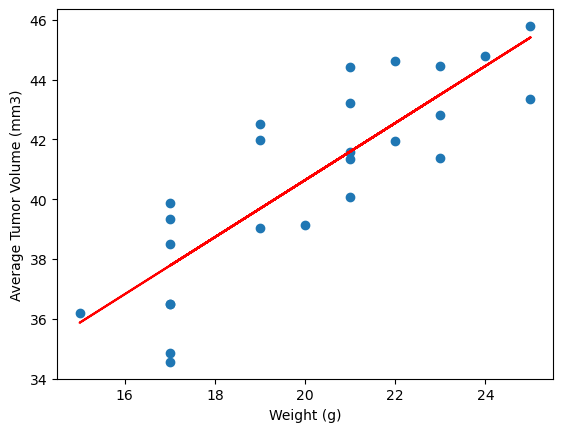

In [90]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(cap_X,cap_y)[0],2)}")

from scipy.stats import linregress

x_values = avg_capoumlin['Weight (g)']
y_values = avg_capoumlin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
